<a href="https://colab.research.google.com/github/Skezzowski/CPT-Calculator/blob/master/Prospect_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [0]:
import numpy as np
from matplotlib import pyplot as pl

#Value function

In [0]:
beta = 0.88
c = 2.25

def valueFunction(x):
  x = np.atleast_1d(x)
  y = np.array([])
  for idx,val in enumerate(x):
    if(val>=0):
       y = np.append(y, val**(1./beta))
    else:
       y = np.append(y,c * (-(-val)**(1./beta)))
  return y


#Weighting (π) function

In [0]:
alfa = 0.6


def weightFunction(x):
  x = np.atleast_1d(x)
  y = np.array([])
  for idx,val in enumerate(x):
      up = val**alfa
      down = pow(val**alfa + (1-val)**alfa, 1/alfa)
      y = np.append(y,up/down)
  return y

#Prospect Theory

In [0]:
def cpt(x,p):
  if  p > 1 or p < 0:
    print("Probability is out of bounds: [0,1]")
    return
  x = np.atleast_1d(x)
  p = np.atleast_1d(p)
  return np.sum(weightFunction(p) * valueFunction(x))

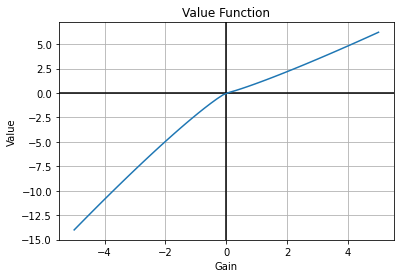

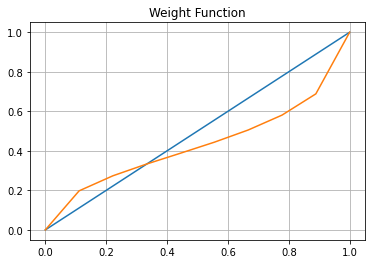

-48.825855100872175


In [9]:
X = np.linspace(-5,5)
X2 = np.linspace(0,1,10)

pl.grid(True, which='both')
pl.axhline(y=0, color='k')
pl.axvline(x=0, color='k')
pl.xlabel("Gain")
pl.ylabel("Value")
pl.plot(X,valueFunction(X))
pl.title("Value Function")
pl.show()

pl.grid(True, which='both')
pl.plot(X2,X2)
pl.plot(X2,weightFunction(X2))
pl.title("Weight Function")
pl.show()

print(cpt(-15,1))